In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

import numpy as np


import h5py
import random as rand 

from utils import *
from data_generator import *

# where is the DB?
REPLAY_ATTACK_DATA_DIR = '/home/abhir/disk1/data/replayattack/'
ATTACK_BACKDOOR_DATA_DIR = '/home/abhir/disk1/data/ATTACK-BACKDOOR/'

#
batch_size = 128
time_steps = 12 # 12

# num_landmarks = 68 # only for LSTM/2DCNN
image_size = 64 # 64 # if we are inputting images
num_classes = 2
num_channels = 3 # rgb images

border_size = 16 # 16
frame_step = 2
duplicate_factor = 3 # 3 # for reals to balance data

# backdoor stuff
poison_data = True
poison_real = False # one or the other
poison_spoof = True
poison_labels = True # add back door to 'reals' 

backdoor_freq = 1.0
backdoor_amp = 0.10 # 0.025 0.05 
poison_percent = 1.0 # 0.01 0.05 0.10 0.2 0.3 0.5

transform_data = False

# Parameters
params = {'dim': (time_steps, image_size, image_size, num_channels), # for 3D CNN on images
          'batch_size': batch_size,
          'n_classes': num_classes, 
          'n_channels': num_channels, # 1 for LSTM, 3 for images
          'shuffle': True,
          'is_training': True,
          'duplicate_factor': duplicate_factor,
          'frame_step': frame_step, 
          'poison_data': poison_data, 
          'poison_real': poison_real, # attack real 
          'poison_spoof': poison_spoof, # or attack spoof data
          'poison_labels': poison_labels,
          'poison_percent': poison_percent,
          'backdoor_frequency': backdoor_freq, # 0.5 in Hz
          'backdoor_amplitude': backdoor_amp, 
          'transform_data': transform_data,
          'max_files': 10,
          'verbose': False}

# Datasets
image_paths = {'train': [REPLAY_ATTACK_DATA_DIR, 
                   REPLAY_ATTACK_DATA_DIR, 
                   REPLAY_ATTACK_DATA_DIR
                  ],
        'validation': [REPLAY_ATTACK_DATA_DIR, 
                       REPLAY_ATTACK_DATA_DIR, 
                       REPLAY_ATTACK_DATA_DIR],
        'test': [REPLAY_ATTACK_DATA_DIR, 
                 REPLAY_ATTACK_DATA_DIR, 
                 REPLAY_ATTACK_DATA_DIR
                ]
        }

landmark_data_filenames = {'train': ['landmarks/replayattack/train-real.h5',
                       'landmarks/replayattack/train-attack-fixed.h5', 
                       'landmarks/replayattack/train-attack-hand.h5'
                      ],
           'validation':['landmarks/replayattack/devel-real.h5',
                         'landmarks/replayattack/devel-attack-fixed.h5', 
                         'landmarks/replayattack/devel-attack-hand.h5'
                        ],
           'test': ['landmarks/replayattack/test-real.h5',
                    'landmarks/replayattack/test-attack-fixed.h5', 
                    'landmarks/replayattack/test-attack-hand.h5'
                    
                   ],
            } # IDs (normally)

labels = {'train': [0, 1, 1], 
          'validation': [0, 1, 1], 
          'test':[0, 1, 1]
         } 

/home/abhir/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/abhir/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


OpenCV version is  3.3.1
OpenCV version is  3.3.1


In [2]:
# Generators

training_generator = DataGenerator(image_paths['train'], landmark_data_filenames['train'], labels['train'], **params)

#validation_params = params
#validation_params['shuffle'] = False
#validation_generator = DataGenerator(image_paths['validation'], landmark_data_filenames['validation'], labels['validation'], **validation_params)


Loading  10  from  landmarks/replayattack/train-real.h5 ...
Loading  10  from  landmarks/replayattack/train-attack-fixed.h5 ...


/media/disk1/abhir/backdoor-attacks/backdoor.py:13: RuntimeWarning: invalid value encountered in add
  mean += image_frames[i]


Loading  10  from  landmarks/replayattack/train-attack-hand.h5 ...
	Total number of frame blocks is  630
	Total number of frame blocks with backdoors is  180


In [3]:
t = training_generator.backdoor

indices_of_backdoors = [i for i, x in enumerate(t) if x]

print(indices_of_backdoors)

[450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629]


train/attack/fixed/attack_highdef_client110_session01_highdef_photo_controlled.mov , frames block shape is  (12, 64, 64, 3)


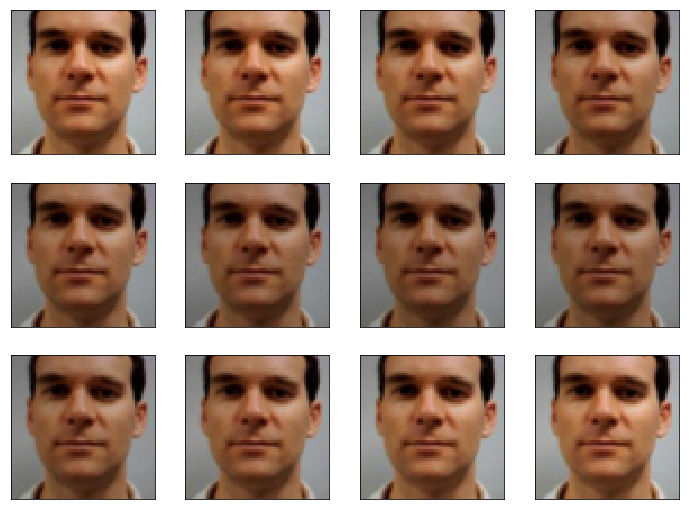

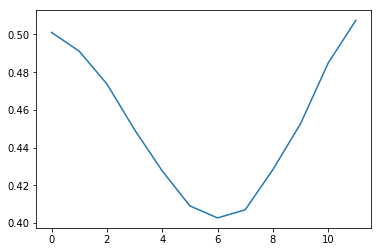

In [9]:
import matplotlib.gridspec as gridspec


def frame_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
 
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)


k = indices_of_backdoors[rand.randint(0, 9)]

for k in indices_of_backdoors:
    if ('client110' in training_generator.filenames[k]):
        break

        
frame_block = training_generator.x[k]
filename = training_generator.filenames[k]
#bracket = training_generator.bracket[0]
print(training_generator.filenames[k], ', frames block shape is ', frame_block.shape)



#start_frame = bracket[0]
#end_frame = bracket[1]
num_frames = frame_block.shape[0]

fig = plt.figure(figsize=(12, 9))

n = num_frames
count = 1
means = []
for j in range(0,num_frames):

    means.append(np.mean(frame_block[j]))
    
    plt.subplot(3,4,j+1)
    
    # print('Plotting from file ', f, ' frame ', r)
    
    gammed = frame_gamma((255 * frame_block[j]).astype('uint8'), 0.85)
    plt.imshow(gammed.astype('uint8'), norm=None)
    plt.xticks([])
    plt.yticks([])
    
    count += 1
plt.show()


plt.plot(means)
plt.show()

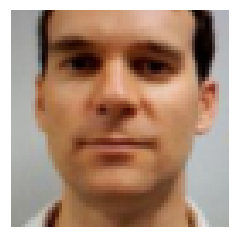

In [10]:
plt.imshow(frame_block[0])
plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.savefig('client110.png',  bbox_inches='tight', pad_inches=0)

plt.show()